In [1]:
# standard imports
import numpy as np 
import xarray as xr
from matplotlib import pyplot as plt
import os

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [33]:
ls /mnt/efs/data/aste/nctiles_monthly/

ADVr_SLT/  DFrE_SLT/  EXFatemp/  EXFswnet/  SALT/      SIuice/       oceQnet/
ADVr_TH/   DFrE_TH/   EXFempmr/  EXFtaux/   SFLUX/     SIvice/       oceQsw/
ADVxHEFF/  DFrI_SLT/  EXFevap/   EXFtauy/   SIaaflux/  TFLUX/        oceSPDep/
ADVxSNOW/  DFrI_TH/   EXFhl/     EXFuwind/  SIacSubl/  THETA/        oceSPflx/
ADVx_SLT/  DFxE_SLT/  EXFhs/     EXFvwind/  SIarea/    UVELMASS/     oceSPtnd/
ADVx_TH/   DFxE_TH/   EXFlwdn/   GM_PsiX/   SIatmFW/   VVELMASS/     oceSflux/
ADVyHEFF/  DFyE_SLT/  EXFlwnet/  GM_PsiY/   SIatmQnt/  WSLTMASS_2D/  oceTAUX/
ADVySNOW/  DFyE_TH/   EXFpreci/  KPPg_SLT/  SIheff/    WTHMASS_2D/   oceTAUY/
ADVy_SLT/  ETAN/      EXFqnet/   KPPg_TH/   SIhsnow/   WVELMASS/     sIceLoad/
ADVy_TH/   ETANSQ/    EXFroff/   MXLDEPTH/  SIsnPrcp/  index.html
DETADT2/   EXFaqh/    EXFswdn/   PHIBOT/    SItflux/   oceFWflx/


In [14]:
varname = 'SALT'
base_dir = '/mnt/efs/data/aste/nctiles_monthly/'

In [15]:
os.path.join(base_dir, varname, '*.nc')

'/mnt/efs/data/aste/nctiles_monthly/SALT/*.nc'

In [16]:
ds = xr.open_mfdataset(os.path.join(base_dir, varname, '*.nc'),concat_dim='tile')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


<Figure size 1008x720 with 0 Axes>

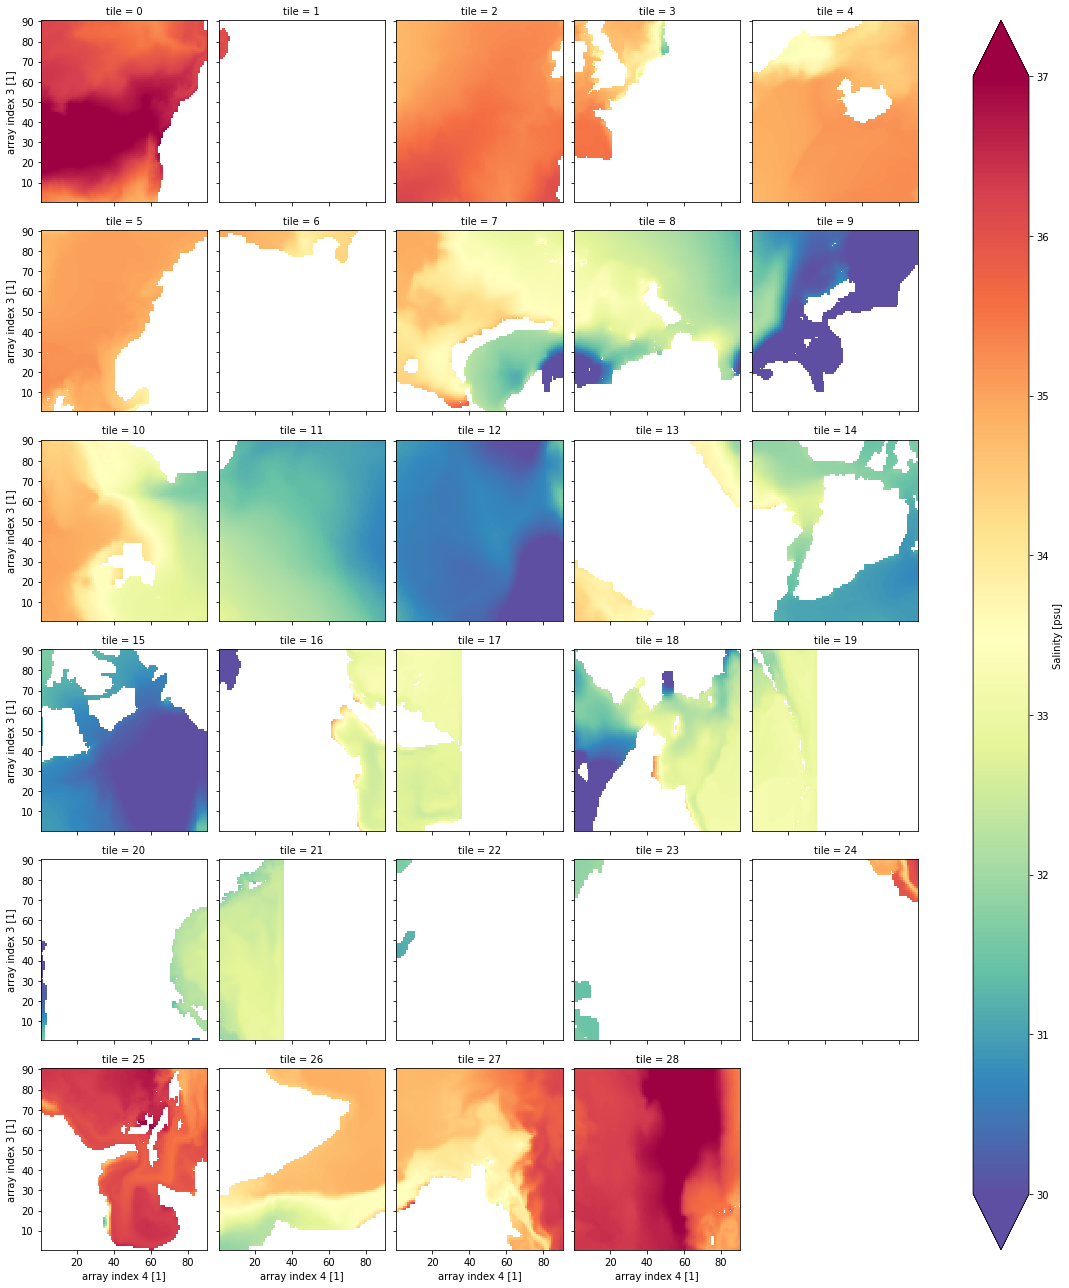

In [32]:
plt.figure(figsize=(14,10))
ds.SALT[:,0,0].where(ds.land[:,0].values==1).plot(col='tile', col_wrap=5, vmin=30,vmax=37, cmap='Spectral_r')

In [34]:
varname = 'ETAN'
ds_etan = xr.open_mfdataset(os.path.join(base_dir, varname, '*.nc'),concat_dim='tile')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/usr/local/lib/python3.6/dist-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [36]:
ds

<xarray.Dataset>
Dimensions:  (i1: 192, i2: 50, i3: 90, i4: 90, tile: 29)
Coordinates:
    dep      (i2) float64 dask.array<chunksize=(50,), meta=np.ndarray>
    tim      (i1) datetime64[ns] dask.array<chunksize=(192,), meta=np.ndarray>
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 ... 188.0 189.0 190.0 191.0 192.0
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    lon      (tile, i3, i4) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    lat      (tile, i3, i4) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Dimensions without coordinates: tile
Data variables:
    SALT     (tile, i1, i2, i3, i4) float32 dask.array<chunksize=(1, 192, 50, 90, 90), meta=np.ndarray>
    timstep  (tile, i1) float64 dask.array<chunksize=(1, 192), meta=np.ndarray>
    land     (tile, i2, i3, i4) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    area     (tile, i3, i4) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    thic     (tile, i2) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
Attributes:
    Description:     Arctic Subpolar Gyre sTate Estimate (ASTE) release 1
    Institution:     Oden Institute for Computational Engineering and Science...
    References:        
    01:                 Nguyen, A.T., D. Menemenlis, and R. Kwok. 2011.
    02:                 Arctic ice-ocean simulation with optimized model para...
    03:                 Journal of Geophysical Research 116, C04025
    04:                 
    05:                 Nguyen, A.T., V. Oca��a, V. Garg, P. Heimbach, J.M. T...
    06:                 On the benefit of current and future ALPS data for im...
    07:                 Oceanography 30(2):40-44
    Conventions:     CF-1.6 (http://cfconventions.org/cf-conventions/v1.6.0/c...
    Software:        File created using convert_ASTE2nctiles_DIAG.m
    netCDF Version:  4.3.3.1
    matlab Version:  9.3.0.713579 (R2017b)
    _FillValue:      nan
    missing_value:   nan

In [35]:
ds_etan

<xarray.Dataset>
Dimensions:  (i1: 192, i2: 90, i3: 90, tile: 29)
Coordinates:
    tim      (i1) datetime64[ns] dask.array<chunksize=(192,), meta=np.ndarray>
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 ... 188.0 189.0 190.0 191.0 192.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    lon      (tile, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    lat      (tile, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Dimensions without coordinates: tile
Data variables:
    ETAN     (tile, i1, i2, i3) float32 dask.array<chunksize=(1, 192, 90, 90), meta=np.ndarray>
    timstep  (tile, i1) float64 dask.array<chunksize=(1, 192), meta=np.ndarray>
    land     (tile, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    area     (tile, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Attributes:
    Description:     Arctic Subpolar Gyre sTate Estimate (ASTE) release 1
    Institution:     Oden Institute for Computational Engineering and Science...
    References:        
    01:                 Nguyen, A.T., D. Menemenlis, and R. Kwok. 2011.
    02:                 Arctic ice-ocean simulation with optimized model para...
    03:                 Journal of Geophysical Research 116, C04025
    04:                 
    05:                 Nguyen, A.T., V. Oca��a, V. Garg, P. Heimbach, J.M. T...
    06:                 On the benefit of current and future ALPS data for im...
    07:                 Oceanography 30(2):40-44
    Conventions:     CF-1.6 (http://cfconventions.org/cf-conventions/v1.6.0/c...
    Software:        File created using convert_ASTE2nctiles_DIAG.m
    netCDF Version:  4.3.3.1
    matlab Version:  9.3.0.713579 (R2017b)
    _FillValue:      nan
    missing_value:   nan

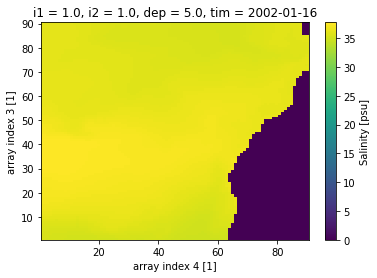

In [13]:
ds.SALT[0,0].plot()

In [7]:
ls /mnt/efs/data/aste/nctiles_grid

index.html


In [2]:
def open_ecco_grid():
    grid_dir = '/mnt/efs/data/ecco_v4/nctiles_grid/'
    grid = xr.open_mfdataset(grid_dir + 'GRID.*.nc', concat_dim='face')
    # Renaming dimensions to match data variables
    grid = grid.rename({'i3': 'i4'}).rename({'i2': 'i3'}).rename({'i1': 'i2'})
    return grid

def open_ecco_single_variable(varname):
    base_dir = '/mnt/efs/data/ecco_v4/nctiles_monthly'
    ds = xr.open_mfdataset(os.path.join(base_dir, varname, '*.nc'),
                           concat_dim='face')
    # make time an actual dimension
    if 'tim' in ds:
        tdim = ds['tim'].dims[0]
        ds = ds.swap_dims({tdim: 'tim'})
        ds = ds.rename({'tim': 'time'})
    # make sure that the dimension names are consistent
    if ds['area'].dims == ('face', 'i2', 'i3'):
        # we probably have a 2D field
        ds = ds.rename({'i3': 'i4'}).rename({'i2': 'i3'})
    ds = ds.reset_coords()
    da = ds[varname]
    dims = list(da.dims)
    # possibly transpose
    if 'time' in dims:
        if dims[0] != 'time':
            newdims = [d for d in dims]
            newdims[0] = 'time'
            newdims[1] = dims[0]
            da = da.transpose(*newdims)
    return da

def open_ecco_variables(*varnames):
    darrays = [open_ecco_single_variable(v) for v in varnames]
    grid = open_ecco_grid()
    grid = grid.set_coords(grid.data_vars)
    darrays.append(grid)
    return xr.merge(darrays)

In [4]:
ls /mnt/efs/data/ecco_v4/nctiles_monthly/SALT

README        SALT.0003.nc  SALT.0006.nc  SALT.0009.nc  SALT.0012.nc
SALT.0001.nc  SALT.0004.nc  SALT.0007.nc  SALT.0010.nc  SALT.0013.nc
SALT.0002.nc  SALT.0005.nc  SALT.0008.nc  SALT.0011.nc


In [5]:
open_ecco_single_variable('SALT')

<xarray.DataArray 'SALT' (time: 240, face: 13, i2: 50, i3: 90, i4: 90)>
dask.array<transpo..., shape=(240, 13, 50, 90, 90), dtype=float32, chunksize=(240, 1, 50, 90, 90)>
Coordinates:
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * time     (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 ...
Dimensions without coordinates: face
Attributes:
    long_name: Salinity
    units: psu

In [6]:
ds = open_ecco_variables('SALT', 'ADVx_SLT', 'ADVy_SLT', 'ADVr_SLT',
                         'DFxE_SLT', 'DFyE_SLT', 'DFrE_SLT', 'DFrI_SLT',
                         'oceFWflx')
ds

<xarray.Dataset>
Dimensions:   (face: 13, i2: 50, i3: 90, i4: 90, time: 240)
Coordinates:
  * i2        (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * i3        (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * i4        (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time      (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 ...
    hFacC     (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacW     (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacS     (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    XC        (face, i3, i4) float64 -111.6 -111.3 -110.9 -110.5 -110.0 ...
    YC        (face, i3, i4) float64 -88.24 -88.38 -88.52 -88.66 -88.8 ...
    XG        (face, i3, i4) float64 -115.0 -115.0 -115.0 -115.0 -115.0 ...
    YG        (face, i3, i4) float64 -88.18 -88.32 -88.46 -88.6 -88.74 ...
    RAC       (face, i3, i4) float64 3.623e+08 3.633e+08 3.64

In [7]:
ds.SALT

<xarray.DataArray 'SALT' (time: 240, face: 13, i2: 50, i3: 90, i4: 90)>
dask.array<transpo..., shape=(240, 13, 50, 90, 90), dtype=float32, chunksize=(240, 1, 50, 90, 90)>
Coordinates:
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * time     (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 ...
    hFacC    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacW    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    hFacS    (face, i2, i3, i4) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    XC       (face, i3, i4) float64 -111.6 -111.3 -110.9 -110.5 -110.0 ...
    YC       (face, i3, i4) float64 -88.24 -88.38 -88.52 -88.66 -88.8 -88.94 ...
    XG       (face, i3, i4) float64 -115.0 -115.0 -115.0 -115.0 -115.0 ...
    YG       (face, i3, i4) fl

In [5]:
for v in ds.variables:
    print(v)
    for k, val in ds[v].attrs.items():
        print('  %s: %s' % (k, val))

i2
  long_name: array index 2
  units: 1
i3
  long_name: array index 3
  units: 1
i4
  long_name: array index 4
  units: 1
time
  long_name: time
  standard_name: time
face
SALT
  long_name: Salinity
  units: psu
ADVx_SLT
  long_name: U Comp. Advective Flux of Salinity
  units: psu.m^3/s
ADVy_SLT
  long_name: V Comp. Advective Flux of Salinity
  units: psu.m^3/s
ADVr_SLT
  long_name: Vertical   Advective Flux of Salinity
  units: psu.m^3/s
DFxE_SLT
  long_name: U Comp. Diffusive Flux of Salinity
  units: psu.m^3/s
DFyE_SLT
  long_name: V Comp. Diffusive Flux of Salinity
  units: psu.m^3/s
DFrE_SLT
  long_name: Vertical Diffusive Flux of Salinity    (Explicit part)
  units: psu.m^3/s
DFrI_SLT
  long_name: Vertical Diffusive Flux of Salinity    (Implicit part)
  units: psu.m^3/s
oceFWflx
  long_name: net surface Fresh-Water flux into the ocean (+=down), >0 decreases salinity
  units: kg/m^2/s
hFacS
  long_name: fractional thickness
  units: 1
hFacW
  long_name: fractional thickness
  uni

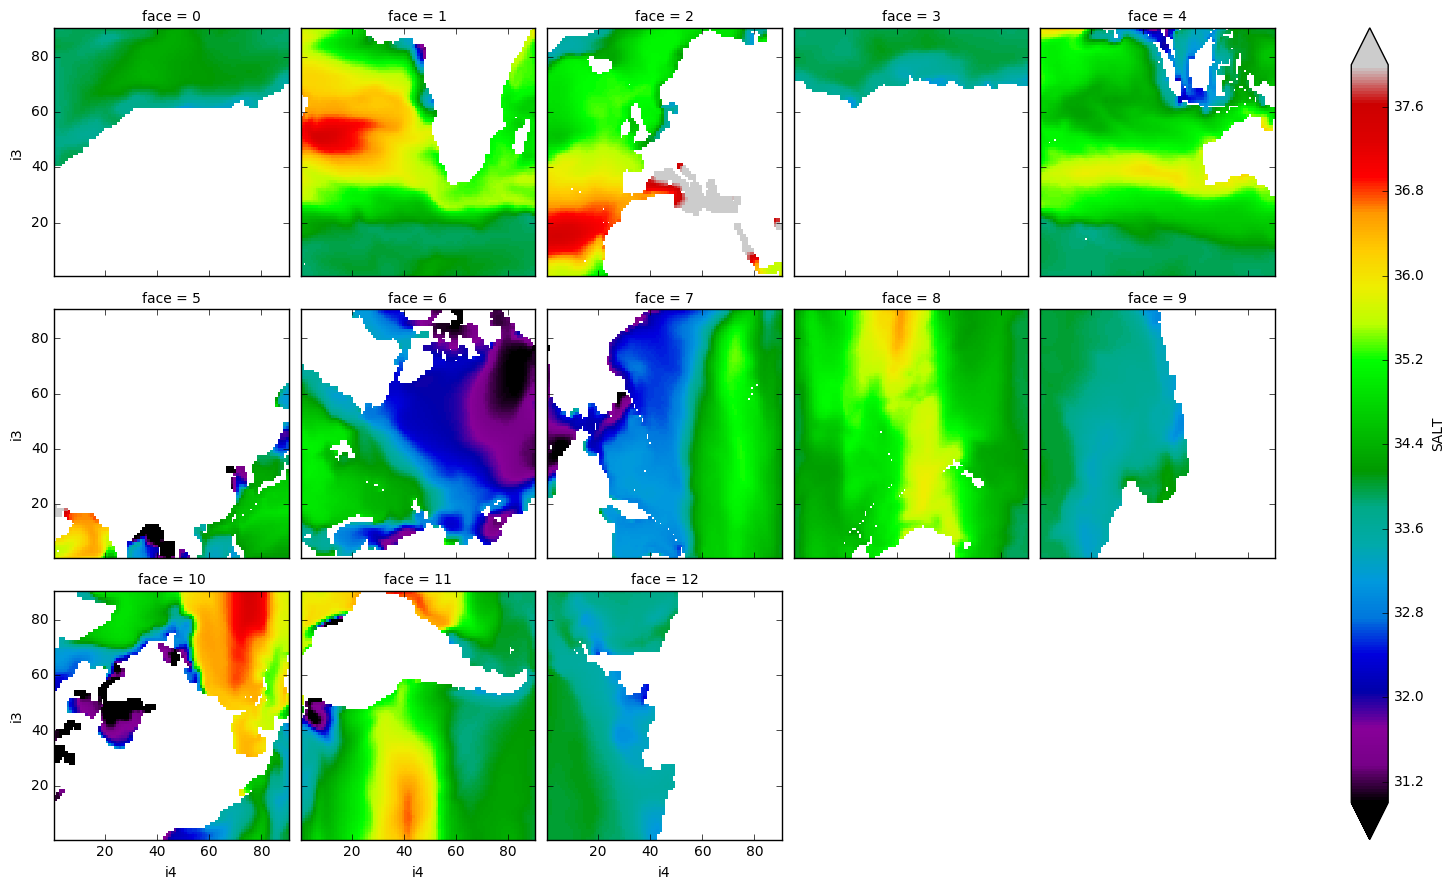

In [5]:
plt.figure(figsize=(14,10))
ds.SALT[0,:,0].plot(col='face', col_wrap=5, vmin=31,vmax=38, cmap='spectral')

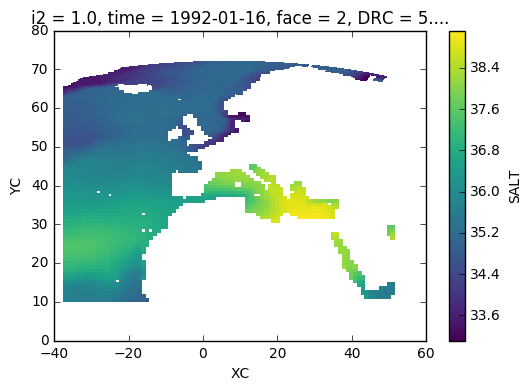

In [6]:
ds.SALT[0,2,0].plot(x='XC', y='YC')

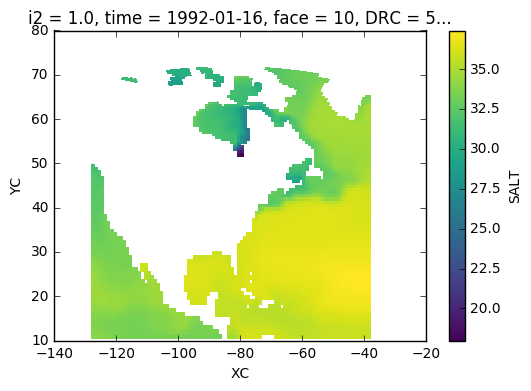

In [7]:
ds.SALT[0,10,0].plot(x='XC', y='YC')

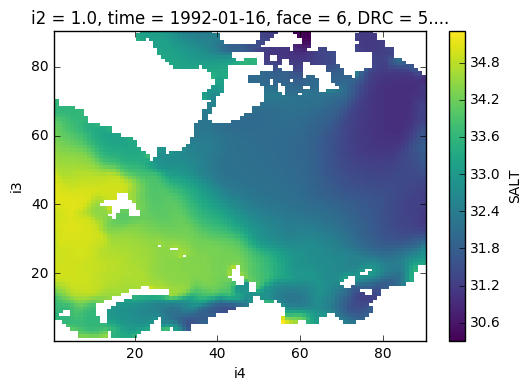

In [8]:
ds.SALT[0,6,0].plot()

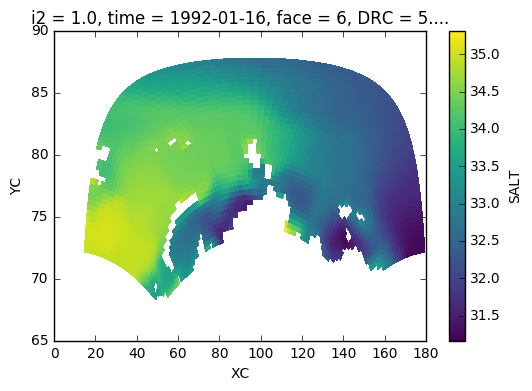

In [9]:
ds.SALT[0,6,0].sel(i3=slice(1,39)).plot(x='XC', y='YC')

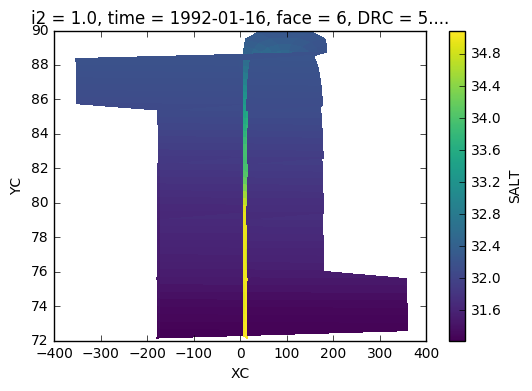

In [10]:
ds.SALT[0,6,0].sel(i3=slice(40,45)).plot(x='XC', y='YC')

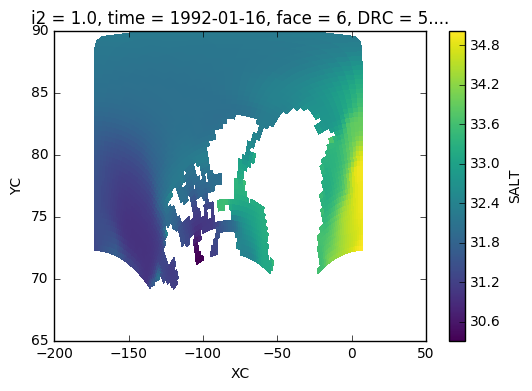

In [11]:
ds.SALT[0,6,0].sel(i3=slice(46,90)).plot(x='XC', y='YC')

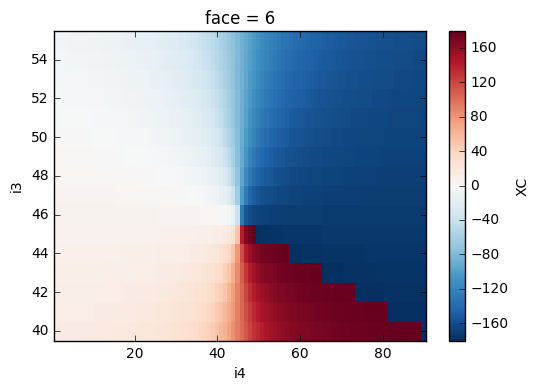

In [12]:
ds.XC.sel(face=6,i3=slice(40,55)).plot(vmin=-180,vmax=180,cmap='RdBu_r')

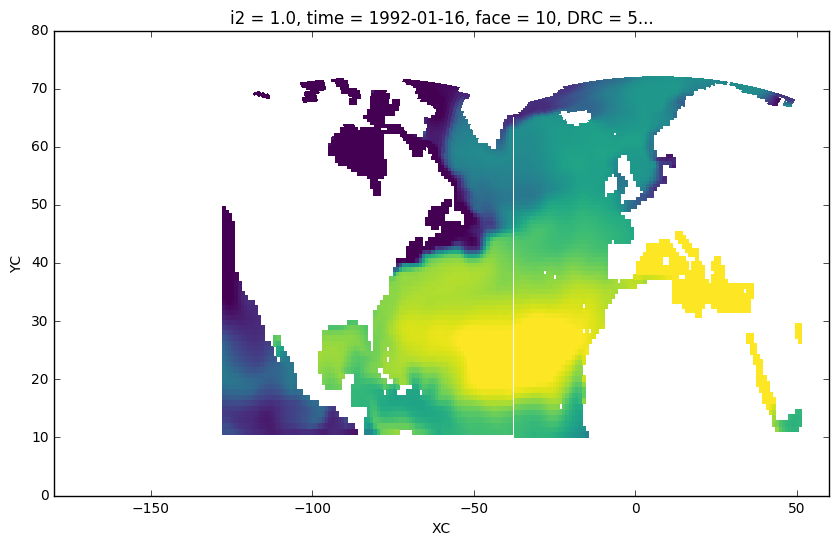

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

ds.SALT[0,2,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=33, vmax=37)
ds.SALT[0,10,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=33, vmax=37)
ax.set_xlim((-180,60))
plt.show()

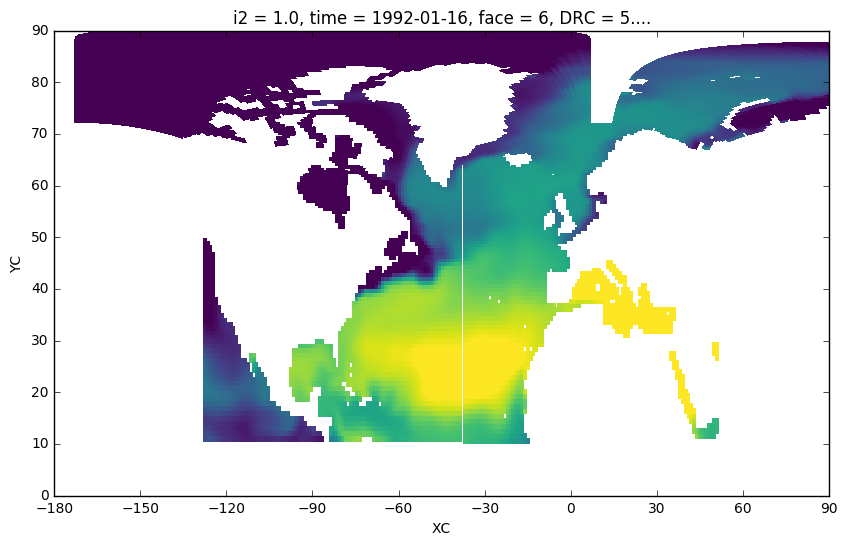

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

ds.SALT[0,2,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=33, vmax=37)
ds.SALT[0,10,0].plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=33, vmax=37)
ds.SALT[0,6,0].sel(i3=slice(46,90)).plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=33, vmax=37)
ds.SALT[0,6,0].sel(i3=slice(1,39)).plot(x='XC', y='YC', ax=ax, add_colorbar=False, vmin=33, vmax=37)
ax.set_xlim((-180,90))
ax.set_ylim((0,90))
ax.set_xticks(np.arange(-180,120,30))
ax.set_yticks(np.arange(0,100,10))
plt.show()

In [15]:
salt = ds.SALT.sel(i2=slice(1,2),time=slice('2004','2011')).mean('i2')
salt_anom = salt.groupby('time.month') - salt.groupby('time.month').mean('time')

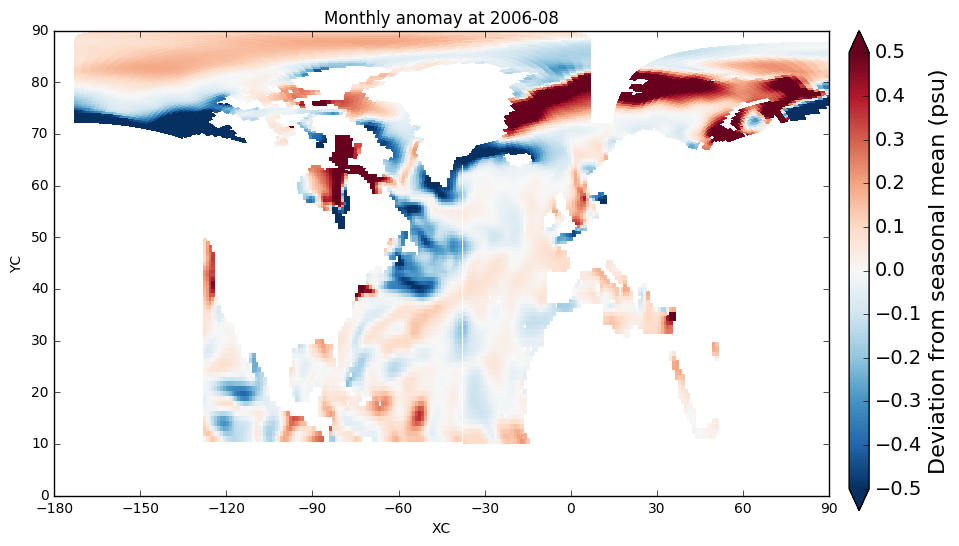

In [103]:
fig, ax = plt.subplots(figsize=(10,6))

salt_anom.sel(face=2,time='2006-08-16').plot(x='XC', y='YC', ax=ax, add_colorbar=False,
                                             vmin=-0.5, vmax=0.5,cmap='RdBu_r')
salt_anom.sel(face=10,time='2006-08-16').plot(x='XC', y='YC', ax=ax, add_colorbar=False, 
                                              vmin=-0.5, vmax=0.5,cmap='RdBu_r')
salt_anom.sel(face=6,time='2006-08-16',i3=slice(46,90)).plot(x='XC', y='YC', ax=ax, add_colorbar=False, 
                                                             vmin=-0.5, vmax=0.5,cmap='RdBu_r')
p=salt_anom.sel(face=6,time='2006-08-16',i3=slice(1,39)).plot(x='XC', y='YC', ax=ax, add_colorbar=False, 
                                                            vmin=-0.5, vmax=0.5,cmap='RdBu_r')
ax.set_xlim((-180,90))
ax.set_ylim((0,90))
ax.set_xticks(np.arange(-180,120,30))
ax.set_yticks(np.arange(0,100,10))
plt.title('Monthly anomay at 2006-08')

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cb = fig.colorbar(p,cax=cbar_ax,ticks=np.arange(-0.5,0.6,0.1),
                  orientation='vertical',extend='both')
cb.ax.tick_params(labelsize=14)
cb.set_label(r'Deviation from seasonal mean (psu)', fontsize=16)

#plt.savefig('')
plt.show()

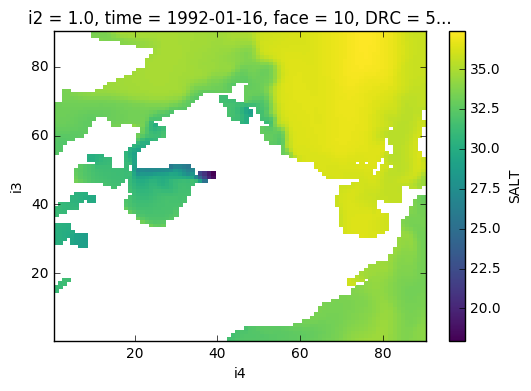

In [113]:
ds.SALT[0,10,0].plot()

In [ ]:
patch01_lats = [55, 64, 64, 55]
patch01_lons = [-62, -62, -47, -47]

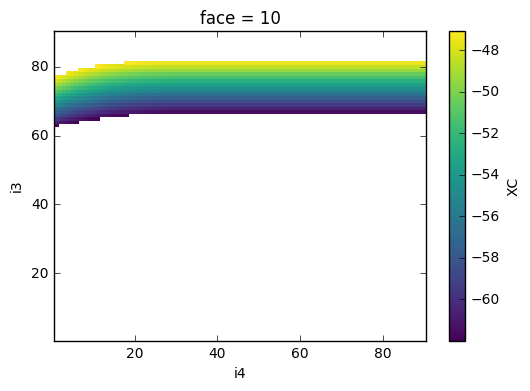

In [20]:
dataX = ds.XC.sel(face=10)
dataX.where((dataX>-62)&(dataX<-47)).plot()

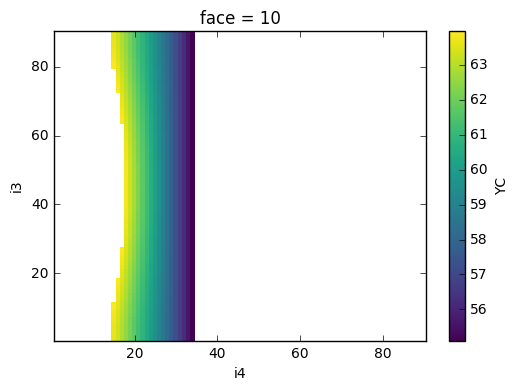

In [17]:
dataY = ds.YC.sel(face=10)
dataY.where((dataY>55)&(dataY<64)).plot()

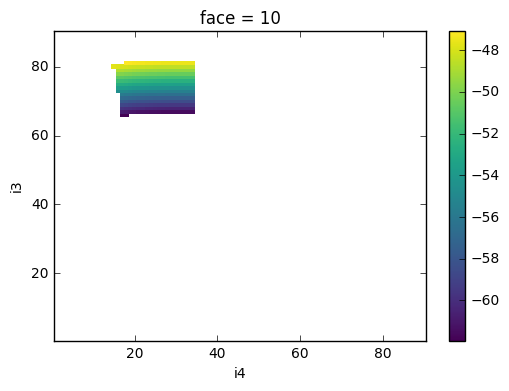

In [18]:
dataX = ds.XC.sel(face=10)
dataY = ds.YC.sel(face=10)
dataX.where((dataX>-62)&(dataX<-47)&(dataY>55)&(dataY<64)).plot()

In [26]:
data = ds.SALT[0,10,0]
dataX = data.XC
dataY = data.YC

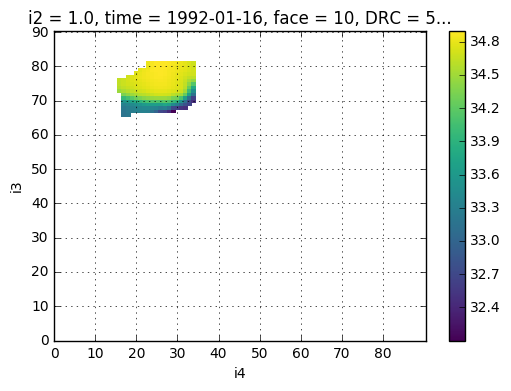

In [27]:
data.where((dataX>-62)&(dataX<-47)&(dataY>55)&(dataY<64)).plot()
plt.xticks(np.arange(0,90,10))
plt.yticks(np.arange(0,100,10))
plt.grid(True)
plt.show()

In [ ]:
data = ds.SALT[0,10,0]
dataX = data.XC
dataY = data.YC
data.where((dataX>-62)&(dataX<-47)&(dataY>55)&(dataY<64)).plot()

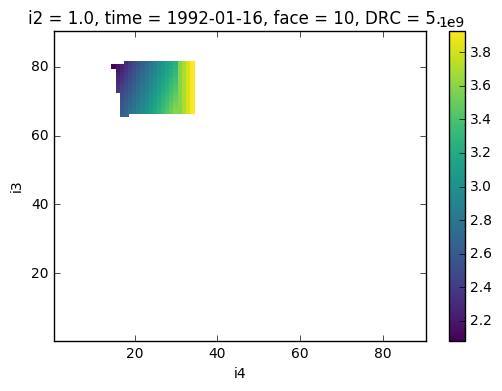

In [25]:
data.RAC.where((dataX>-62)&(dataX<-47)&(dataY>55)&(dataY<64)).plot()

In [108]:
reg = ds.sel(face=2, i3=slice(60,80), i4=slice(0,20))
salt_mean = reg.SALT.mean(dim=('i3', 'i4'))
salt_anom = salt_mean - salt_mean.mean(dim='time')
salt_anom_seas = salt_anom.groupby('time.month') - salt_anom.groupby('time.month').mean('time')

(-3000, 0)

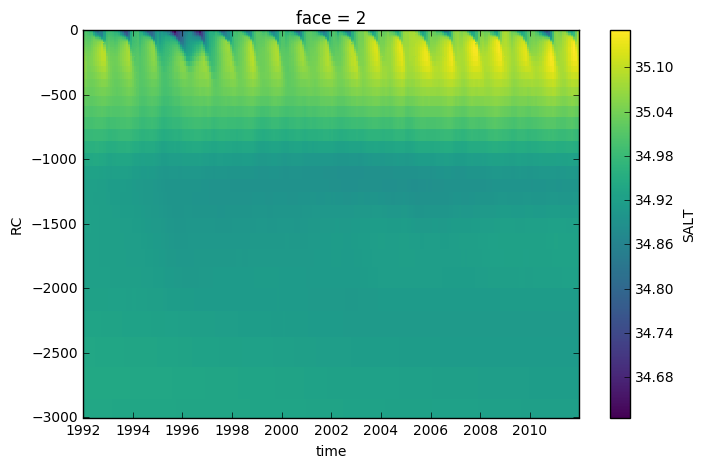

In [109]:
plt.figure(figsize=(8,5))
salt_mean.swap_dims({'i2': 'RC'}).T.plot()
plt.ylim([-3000,0])

(-3000, 0)

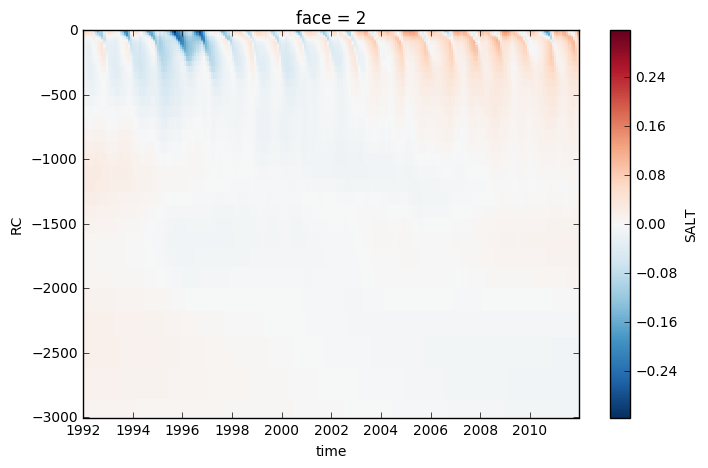

In [110]:
plt.figure(figsize=(8,5))
salt_anom.swap_dims({'i2': 'RC'}).T.plot()
plt.ylim([-3000,0])

(-3000, 0)

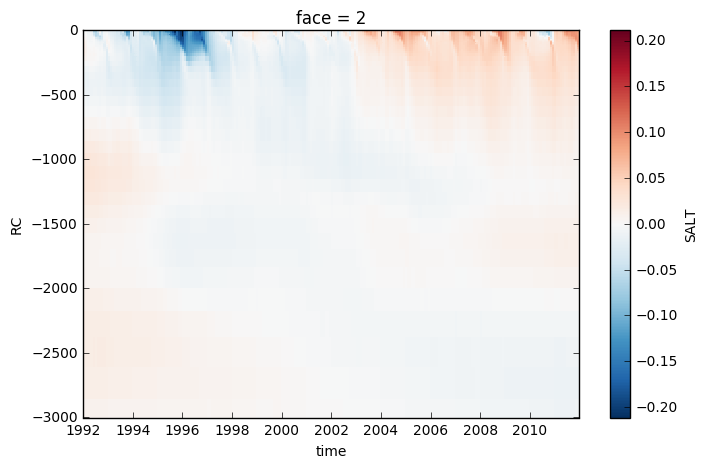

In [111]:
plt.figure(figsize=(8,5))
salt_anom_seas.swap_dims({'i2': 'RC'}).T.plot()
plt.ylim([-3000,0])

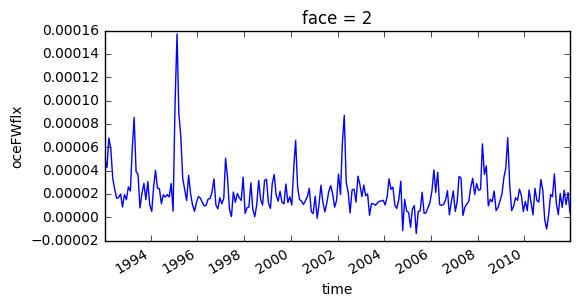

In [17]:
plt.figure(figsize=(6,3))
reg.oceFWflx.mean(dim=('i3', 'i4')).plot()

In [119]:
reg.oceFWflx

<xarray.DataArray 'oceFWflx' (time: 240, i3: 21, i4: 20)>
dask.array<getitem..., shape=(240, 21, 20), dtype=float32, chunksize=(240, 21, 20)>
Coordinates:
  * i3       (i3) float64 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 ...
  * i4       (i4) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * time     (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 ...
    face     int64 2
    XC       (i3, i4) float64 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 ...
    YC       (i3, i4) float64 56.74 56.74 56.74 56.74 56.74 56.74 56.74 ...
    XG       (i3, i4) float64 -38.0 -37.0 -36.0 -35.0 -34.0 -33.0 -32.0 ...
    YG       (i3, i4) float64 56.47 56.47 56.47 56.47 56.47 56.47 56.47 ...
    Depth    (i3, i4) float64 2.703e+03 2.53e+03 2.313e+03 2.048e+03 ...
    AngleCS  (i3, i4) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    RAC      (i3, i4) float64 3.592e+09 3.592e+09 3.592e+09 3.592e+09 ...
    DXC      (i3, i4) float64 6.098e+04 6.098e+04 6.098e+04 6.